### Importing Libraries

In [38]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
#changing the directory
os.chdir(r"F:\data softwares work\phython\for codes")

In [41]:
#files present in directory 
os.listdir()

['b_table.csv',
 'decision tree.png',
 'Feature_imp.csv',
 'fghjk.csv',
 'loadings.csv',
 'table.csv',
 'train_profile.csv',
 'Variance.csv']

In [42]:
#reading the car data
car=pd.read_csv("F:\data softwares work\phython\car_done.csv")

### EDA(exploratory data analysis)

In [43]:
#getting first five rows

car.head()

,Unnamed: 0,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [44]:
#getting last five rows

car.tail()

,Unnamed: 0,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
152,152,Volvo,V40,3.545,NaN,Passenger,24.4,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,153,Volvo,S70,15.245,NaN,Passenger,27.5,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,154,Volvo,V70,17.531,NaN,Passenger,28.8,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,155,Volvo,C70,3.493,NaN,Passenger,45.5,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357
156,156,Volvo,S80,18.969,NaN,Passenger,36.0,2.9,201.0,109.9,72.1,189.8,3.600,21.1,24.0,11/14/2011,85.735655


In [45]:
car.shape  # Rows = 157, column=17

(157, 17)

In [46]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              157 non-null    int64  
 1   Manufacturer            157 non-null    object 
 2   Model                   157 non-null    object 
 3   Sales_in_thousands      157 non-null    float64
 4   four_year_resale_value  121 non-null    float64
 5   Vehicle_type            157 non-null    object 
 6   Price_in_thousands      155 non-null    float64
 7   Engine_size             156 non-null    float64
 8   Horsepower              156 non-null    float64
 9   Wheelbase               156 non-null    float64
 10  Width                   156 non-null    float64
 11  Length                  156 non-null    float64
 12  Curb_weight             155 non-null    float64
 13  Fuel_capacity           156 non-null    float64
 14  Fuel_efficiency         154 non-null    fl

In [47]:
car["Unnamed: 0"].min()

0

In [48]:
car["Unnamed: 0"].describe()

count    157.000000
mean      78.000000
std       45.466105
min        0.000000
25%       39.000000
50%       78.000000
75%      117.000000
max      156.000000
Name: Unnamed: 0, dtype: float64

In [49]:
car["Unnamed: 0"].value_counts()

0      1
108    1
101    1
102    1
103    1
      ..
53     1
54     1
55     1
56     1
156    1
Name: Unnamed: 0, Length: 157, dtype: int64

In [50]:
#as unnamed column is not needed in our model so dropping it,because it doesnt have any significance with our target variable
car.drop(columns=["Unnamed: 0"], inplace=True)

In [51]:
car.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', 'four_year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [52]:
car["Manufacturer"].value_counts()

Dodge         11
Ford          11
Chevrolet      9
Mercedes-B     9
Toyota         9
Chrysler       7
Nissan         7
Mitsubishi     7
Pontiac        6
Volkswagen     6
Oldsmobile     6
Mercury        6
Volvo          6
Lexus          6
Honda          5
Cadillac       5
Saturn         5
Plymouth       4
Acura          4
Buick          4
Porsche        3
Jeep           3
Hyundai        3
BMW            3
Lincoln        3
Audi           3
Saab           2
Subaru         2
Jaguar         1
Infiniti       1
Name: Manufacturer, dtype: int64

In [53]:
car["Model"].value_counts()

Neon              2
Ram Pickup        1
LeSabre           1
SLK               1
Contour           1
                 ..
Outback           1
Montero           1
Montana           1
Grand Cherokee    1
GS400             1
Name: Model, Length: 156, dtype: int64

In [54]:
car.drop(columns=["Manufacturer", "Model"], inplace=True)

In [55]:
car.columns

Index(['Sales_in_thousands', 'four_year_resale_value', 'Vehicle_type',
       'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width',
       'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency',
       'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [56]:
car.dtypes

Sales_in_thousands        float64
four_year_resale_value    float64
Vehicle_type               object
Price_in_thousands        float64
Engine_size               float64
Horsepower                float64
Wheelbase                 float64
Width                     float64
Length                    float64
Curb_weight               float64
Fuel_capacity             float64
Fuel_efficiency           float64
Latest_Launch              object
Power_perf_factor         float64
dtype: object

<AxesSubplot:>

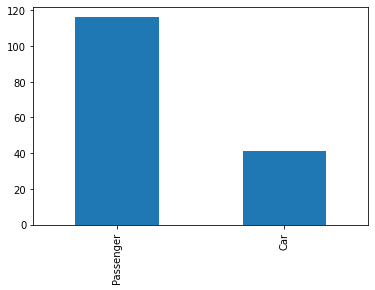

In [57]:
car["Vehicle_type"].value_counts().plot(kind="bar")

<AxesSubplot:ylabel='Vehicle_type'>

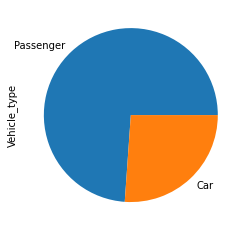

In [58]:
car["Vehicle_type"].value_counts().plot(kind="pie")

In [59]:
car["Sales_in_thousands"].describe()

count    157.000000
mean      52.998076
std       68.029422
min        0.110000
25%       14.114000
50%       29.450000
75%       67.956000
max      540.561000
Name: Sales_in_thousands, dtype: float64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales_in_thousands', ylabel='Density'>

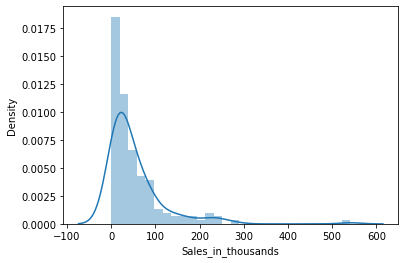

In [60]:
sns.distplot(car["Sales_in_thousands"])

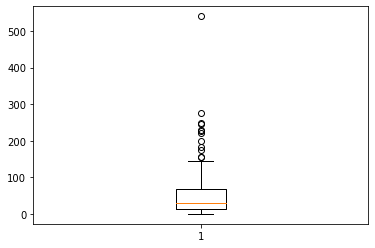

In [61]:
plt.boxplot(car["Sales_in_thousands"])
plt.show()

In [62]:
car["Price_in_thousands"].describe()

count    155.000000
mean      27.390755
std       14.351653
min        9.235000
25%       18.017500
50%       22.799000
75%       31.947500
max       85.500000
Name: Price_in_thousands, dtype: float64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


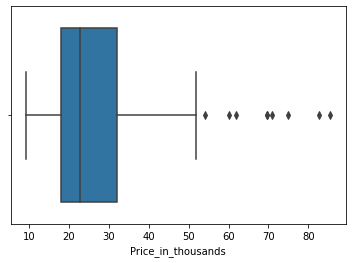

In [63]:
sns.boxplot(car["Price_in_thousands"])
plt.show()

In [64]:
car["Latest_Launch"].value_counts()

1/24/2011    2
4/26/2011    2
3/7/2011     2
5/6/2011     2
9/10/2012    2
            ..
8/3/2012     1
1/16/2012    1
1/14/2012    1
8/5/2011     1
2/13/2008    1
Name: Latest_Launch, Length: 130, dtype: int64

In [65]:
car.drop(columns=["Latest_Launch"], inplace=True)

### Bivariate analysis

In [66]:
# Cat-Cat
# Cat-Num
# Num- Num
car.groupby(["Vehicle_type"]).agg({"Sales_in_thousands":["count","min", "max", "mean", "std"]})

Sales_in_thousands                                      
                          count    min      max       mean        std
Vehicle_type                                                         
Car                          41  9.126  540.561  80.622293  98.192626
Passenger                   116  0.110  247.994  43.234345  50.557875

In [67]:
car.groupby(["Vehicle_type"]).agg({"Price_in_thousands":["count","min", "max", "mean", "std"]})

Price_in_thousands                                      
                          count     min     max       mean        std
Vehicle_type                                                         
Car                          40  11.528  60.105  26.319975  10.169436
Passenger                   115   9.235  85.500  27.763200  15.566574

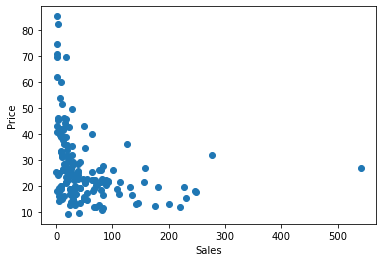

In [68]:
plt.scatter(car["Sales_in_thousands"],car["Price_in_thousands"] )  # Y~Xs ; Xs~Xs
plt.xlabel("Sales")
plt.ylabel("Price")
plt.show()

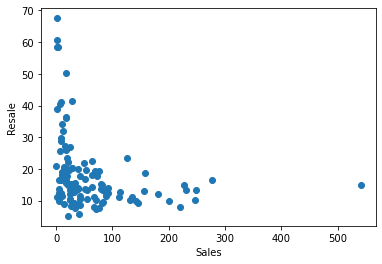

In [69]:
plt.scatter(car["Sales_in_thousands"],car["four_year_resale_value"] )  # Y~Xs ; Xs~Xs
plt.xlabel("Sales")
plt.ylabel("Resale")
plt.show()

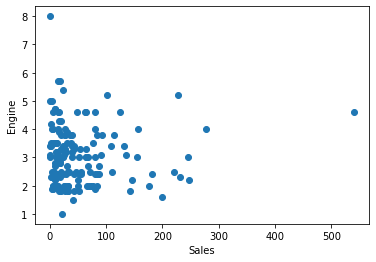

In [70]:
plt.scatter(car["Sales_in_thousands"],car["Engine_size"] )  # Y~Xs ; Xs~Xs
plt.xlabel("Sales")
plt.ylabel("Engine")
plt.show()

In [71]:
car.columns

Index(['Sales_in_thousands', 'four_year_resale_value', 'Vehicle_type',
       'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width',
       'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency',
       'Power_perf_factor'],
      dtype='object')

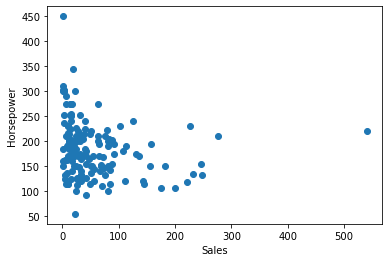

In [72]:
plt.scatter(car["Sales_in_thousands"],car["Horsepower"] )  # Y~Xs ; Xs~Xs
plt.xlabel("Sales")
plt.ylabel("Horsepower")
plt.show()

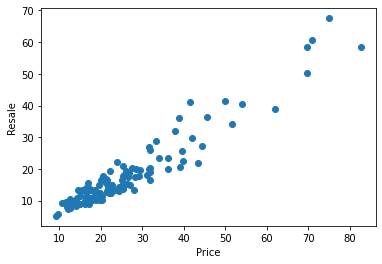

In [73]:
plt.scatter(car["Price_in_thousands"],car["four_year_resale_value"] )  #  Xs~Xs
plt.xlabel("Price")
plt.ylabel("Resale")
plt.show()

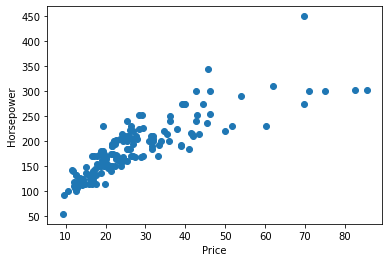

In [74]:
plt.scatter(car["Price_in_thousands"],car["Horsepower"] )  #  Xs~Xs
plt.xlabel("Price")
plt.ylabel("Horsepower")
plt.show()

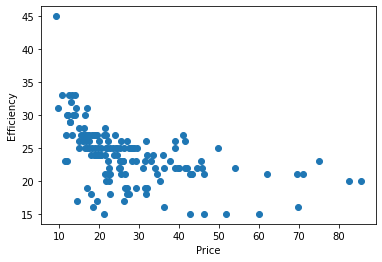

In [75]:
plt.scatter(car["Price_in_thousands"],car["Fuel_efficiency"] )  #  Xs~Xs
plt.xlabel("Price")
plt.ylabel("Efficiency")
plt.show()

### Doing bivariate analysis only in one step on whole data

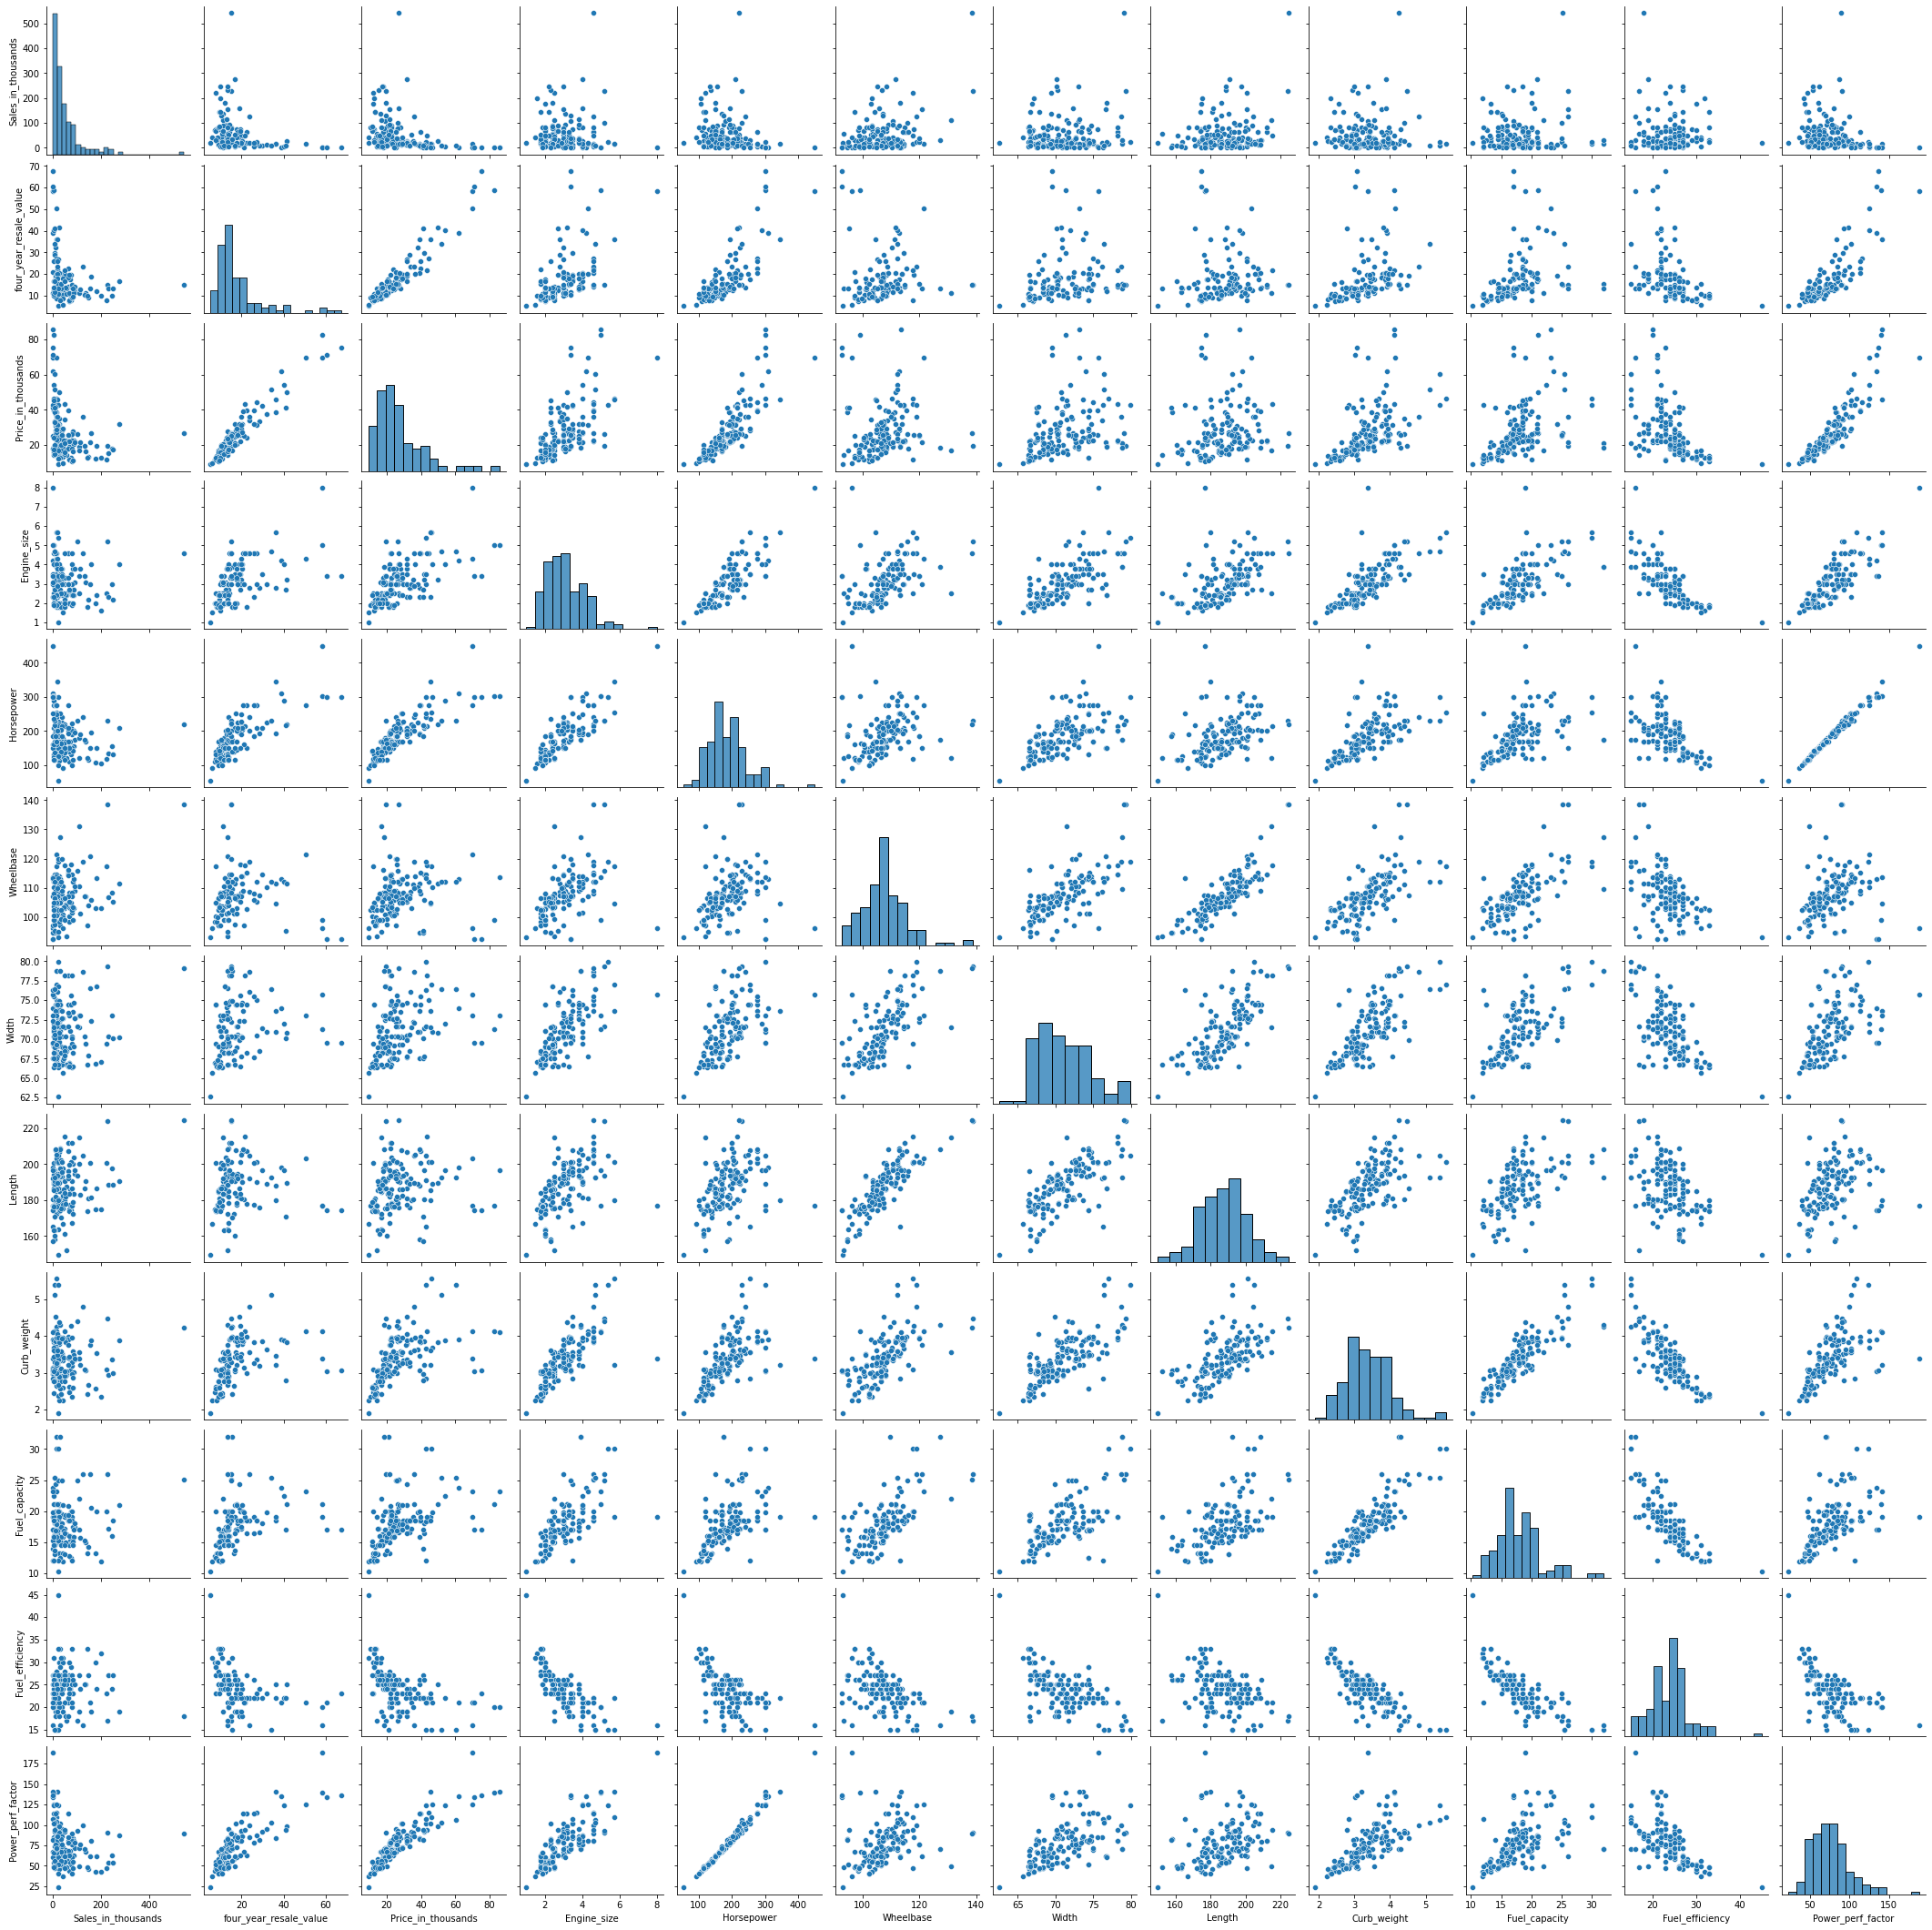

In [76]:
sns.pairplot(car)
plt.show()

In [77]:
#checking correlation of diff columns with each other
cr=car.corr()

In [78]:
cr

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Sales_in_thousands,1.000000,-0.279034,-0.304734,0.019983,-0.197756,0.358179,0.140918,0.254980,0.008628,0.086540,-0.016764,-0.223252
four_year_resale_value,-0.279034,1.000000,0.953840,0.531330,0.769081,-0.052270,0.178767,0.026548,0.361557,0.325567,-0.399880,0.827123
Price_in_thousands,-0.304734,0.953840,1.000000,0.626875,0.839744,0.110513,0.329136,0.156935,0.526224,0.423282,-0.492157,0.897945
Engine_size,0.019983,0.531330,0.626875,1.000000,0.837360,0.472130,0.690398,0.541424,0.760043,0.663022,-0.734622,0.818528
Horsepower,-0.197756,0.769081,0.839744,0.837360,1.000000,0.286308,0.539158,0.393364,0.610131,0.499907,-0.611332,0.992994
Wheelbase,0.358179,-0.052270,0.110513,0.472130,0.286308,1.000000,0.683135,0.839639,0.651016,0.654044,-0.497931,0.258852
Width,0.140918,0.178767,0.329136,0.690398,0.539158,0.683135,1.000000,0.710435,0.720927,0.656302,-0.602546,0.512025
Length,0.254980,0.026548,0.156935,0.541424,0.393364,0.839639,0.710435,1.000000,0.627163,0.563540,-0.446756,0.354095
Curb_weight,0.008628,0.361557,0.526224,0.760043,0.610131,0.651016,0.720927,0.627163,1.000000,0.863968,-0.818402,0.612071
Fuel_capacity,0.086540,0.325567,0.423282,0.663022,0.499907,0.654044,0.656302,0.563540,0.863968,1.000000,-0.801512,0.501184


### Outlier Treatment & Missing Value Treatment

In [79]:
st=car.describe(percentiles=[0.01,0.02, .03,0.04, 0.05, 0.1, .2, .25, .5,.75,.9, .95,.96,.97,.98,.99]).T

In [80]:
#this is the capping method used for outlier treatment 

car["Sales_in_thousands"]=np.where(car["Sales_in_thousands"]>257.0863424, 257.0863424, car["Sales_in_thousands"])
car["Engine_size"]=np.where(car["Engine_size"]>6.194856356, 6.194856356, car["Engine_size"])
car["Horsepower"]=np.where(car["Horsepower"]>356.0496805, 356.0496805, car["Horsepower"])
car["Fuel_efficiency"]=np.where(car["Fuel_efficiency"]>36.69227253, 36.69227253, car["Fuel_efficiency"])
car["Power_perf_factor"]=np.where(car["Power_perf_factor"]>152.4715835, 152.4715835, car["Power_perf_factor"])

In [81]:
car["Sales_in_thousands"].describe(percentiles=[0.01,0.02,.03,0.04, 0.05, 0.1, .2, .25, .5,.75,.9, .95,.96,.97,.98,.99]).T

count    157.000000
mean      51.067278
std       57.563004
min        0.110000
1%         0.937280
2%         1.132160
3%         1.348000
4%         1.607600
5%         1.870800
10%        5.453600
20%       11.215400
25%       14.114000
50%       29.450000
75%       67.956000
90%      127.641600
95%      185.336200
96%      215.618400
97%      228.290120
98%      244.025440
99%      251.994631
max      257.086342
Name: Sales_in_thousands, dtype: float64

In [82]:
car.isnull().sum()

Sales_in_thousands         0
four_year_resale_value    36
Vehicle_type               0
Price_in_thousands         2
Engine_size                1
Horsepower                 1
Wheelbase                  1
Width                      1
Length                     1
Curb_weight                2
Fuel_capacity              1
Fuel_efficiency            3
Power_perf_factor          2
dtype: int64

In [83]:
car1=car.dropna()

In [84]:
car1.shape

(117, 13)

In [85]:
car.shape

(157, 13)

In [86]:
car2=car.fillna(value=car.mean())

In [87]:
car2.isnull().sum()

Sales_in_thousands        0
four_year_resale_value    0
Vehicle_type              0
Price_in_thousands        0
Engine_size               0
Horsepower                0
Wheelbase                 0
Width                     0
Length                    0
Curb_weight               0
Fuel_capacity             0
Fuel_efficiency           0
Power_perf_factor         0
dtype: int64

### Normality check 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales_in_thousands', ylabel='Density'>

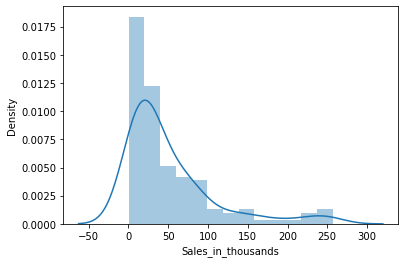

In [88]:
sns.distplot(car["Sales_in_thousands"])

In [89]:
from scipy.stats import shapiro

In [90]:
shapiro(car2["Sales_in_thousands"])
# Null Hypothesis : Data is Normal 
# Alter Hypo      : Data is not Normal

ShapiroResult(statistic=0.7559575438499451, pvalue=7.179485989278287e-15)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales_in_thousands', ylabel='Density'>

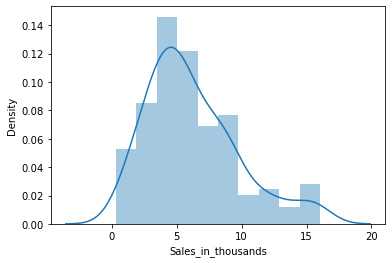

In [91]:
sns.distplot(np.sqrt(car2['Sales_in_thousands']))

In [92]:
shapiro(np.sqrt(car2['Sales_in_thousands']))

ShapiroResult(statistic=0.935739278793335, pvalue=1.575154442434723e-06)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales_in_thousands', ylabel='Density'>

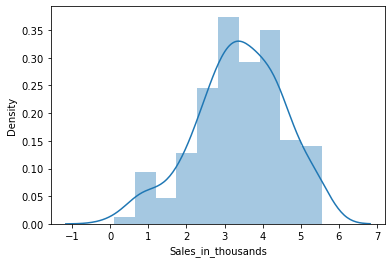

In [93]:
sns.distplot(np.log1p(car2['Sales_in_thousands']))

In [94]:
shapiro(np.log1p(car2['Sales_in_thousands']))

ShapiroResult(statistic=0.982882559299469, pvalue=0.04899801313877106)

In [95]:
car2["Sales_log"]=np.log(car2['Sales_in_thousands'])

In [96]:
car2.columns

Index(['Sales_in_thousands', 'four_year_resale_value', 'Vehicle_type',
       'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width',
       'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency',
       'Power_perf_factor', 'Sales_log'],
      dtype='object')

In [97]:
car2["vehicle_dummy"]=np.where(car2["Vehicle_type"]=="Car",1,0)

In [98]:
y=car2["Sales_log"]
X=car2[['four_year_resale_value', 'vehicle_dummy',
       'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width',
       'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency',
       'Power_perf_factor']]

In [99]:
X.shape

(157, 12)

In [100]:
import statsmodels.api as sm

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=88)

In [103]:
X_train.shape

(109, 12)

In [104]:
X_train=sm.add_constant(X_train)

In [105]:
X_test=sm.add_constant(X_test)

In [106]:
model1=sm.OLS(y_train, X_train).fit()   # Fitting a model / developing a model 

In [107]:
print(model1.summary()) 

                            OLS Regression Results                            
Dep. Variable:              Sales_log   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     9.175
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           1.62e-11
Time:                        22:48:10   Log-Likelihood:                -136.44
No. Observations:                 109   AIC:                             298.9
Df Residuals:                      96   BIC:                             333.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -5

In [108]:
# Hypothesis in Regression 
# Ho: all m values ( Coeffiecient) are zeros ( Y does not depend on any of the given independent Var)
# Ha: any one of m is not zero( Y does depend on atleast on one iV )

In [109]:
y=car2["Sales_log"]
X=car2[[ 'vehicle_dummy',
       'Price_in_thousands',
       'Length']]
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=88)
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)
model2=sm.OLS(y_train, X_train).fit()
print(model2.summary()) 

                            OLS Regression Results                            
Dep. Variable:              Sales_log   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     33.49
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           2.87e-15
Time:                        22:48:11   Log-Likelihood:                -141.49
No. Observations:                 109   AIC:                             291.0
Df Residuals:                     105   BIC:                             301.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.9680      1

In [110]:
R^2 > 60


NameError: name 'R' is not defined

In [111]:
Predicted=np.exp(model2.predict(X_train))

In [112]:
y_act=np.exp(y_train)

In [113]:
print("MSE", np.mean(np.square(y_act-Predicted)))
print("RMSE", np.sqrt(np.mean(np.square(y_act-Predicted) )))
print("MAE", np.mean(abs(y_act-Predicted) ))  # mean absolute Error
print("MAPE", np.mean(abs((y_act-Predicted)/y_act )))  # Mean Absolute Percentage Error

MSE 2178.04734003093
RMSE 46.66955474429695
MAE 26.964097283829876
MAPE 1.1838207756282475


In [114]:
Predictedt=np.exp(model2.predict(X_test))
y_actt=np.exp(y_test)

In [115]:
print("MSE", np.mean(np.square(y_actt-Predictedt)))
print("RMSE", np.sqrt(np.mean(np.square(y_actt-Predictedt) )))
print("MAE", np.mean(abs(y_actt-Predictedt) ))  # mean absolute Error
print("MAPE", np.mean(abs((y_actt-Predictedt)/y_actt )))  # Mean Absolute Percentage Error

MSE 3521.112724631666
RMSE 59.33896464071197
MAE 36.423741847233394
MAPE 4.793697903973254


In [116]:
y=car2["Sales_log"]
X=car2[['four_year_resale_value', 'vehicle_dummy',
       'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width',
       'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency',
       'Power_perf_factor']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=88)

In [117]:
from sklearn.linear_model import LinearRegression

In [118]:
Lr=LinearRegression()

In [119]:
Lr.fit(X_train, y_train)   # Model fitting 

LinearRegression()

In [120]:
r_sqr=Lr.score(X_train, y_train)   # R^2 of model

In [121]:
Lr.coef_  # Coeff of all variable

array([ 3.81647098e-02,  7.11344670e-01,  5.07257746e+06,  3.42614272e+06,
        4.65100203e+06,  1.53470631e-02,  3.92542297e-02,  1.69058530e-02,
        1.13373543e-01, -2.18502369e-02,  8.56201509e-02, -1.31497219e+07])

In [122]:
Lr.intercept_  # Constant term or intercept (c)

-5.829320416679369

In [123]:
from sklearn import metrics

In [124]:
pred_train=np.exp(Lr.predict(X_train))
y_train_act=np.exp(y_train)

In [125]:
# metrics.r2_score(y_train_act, pred_train)  # ( actual , Predicted Value )

In [126]:
r_sqr=Lr.score(X_train, y_train)

In [127]:
X_train.shape

(109, 12)

In [128]:
1- ( 1-r_sqr)*(109-1)/ (109-12-1)

0.475973680422935

In [129]:
# SS_Residual = sum((yTrain-yPrediction)**2)
# SS_Total = sum((yTrain-np.mean(yTrain))**2)
# #r_squared = 1 - (float(SS_Residual))/SS_Total
# r_squared=(SS_Total-SS_Residual)/SS_Total

adjusted_r_squared = 1 - (1-r_sqr)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)

adjusted_r_squared


0.475973680422935

In [130]:
y=car2["Sales_log"]
X=car2[['four_year_resale_value', 'vehicle_dummy',
       'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width',
       'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency',
       'Power_perf_factor']]

In [131]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [132]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif['vif_value'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values('vif_value', ascending=False)

,vif_value,features
11,5192.355274,Power_perf_factor
4,3667.788906,Horsepower
7,1139.873484,Length
5,1021.992292,Wheelbase
6,742.306084,Width
8,243.586558,Curb_weight
2,163.897969,Price_in_thousands
10,134.073667,Fuel_efficiency
9,123.466883,Fuel_capacity
3,62.343494,Engine_size


In [133]:
y=car2["Sales_log"]
X=car2[[ 'vehicle_dummy',
       'Price_in_thousands', 'Engine_size', 
         'Fuel_efficiency']]
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif['vif_value'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values('vif_value', ascending=False)

,vif_value,features
2,16.059680,Engine_size
1,8.402433,Price_in_thousands
3,5.515514,Fuel_efficiency
0,1.680069,vehicle_dummy


In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=88)
from sklearn.linear_model import LinearRegression
Lr=LinearRegression()

In [135]:
Lr.fit(X_train, y_train)

LinearRegression()

In [136]:
Lr.score(X_train, y_train)

0.4624604819992857

In [137]:
r_sqr=Lr.score(X_train, y_train)

In [138]:
adjusted_r_squared = 1 - (1-r_sqr)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)

adjusted_r_squared

0.44178588515310435

In [139]:
Lr.coef_

array([ 0.54899825, -0.06592318,  0.62168168,  0.06252056])

In [140]:
Lr.intercept_

1.598350057850665

In [141]:
X_train.columns

Index(['vehicle_dummy', 'Price_in_thousands', 'Engine_size',
       'Fuel_efficiency'],
      dtype='object')

In [142]:
X_test1=X_test.copy()

In [143]:
X_test1["Predicted_Sale"]=np.exp(0.54899825*X_test1["vehicle_dummy"]-0.06592318*X_test1["Price_in_thousands"]+0.62168168*X_test1["Engine_size"]+0.06252056*X_test1["Fuel_efficiency"]+1.598350057850676)

In [144]:
X_test1

,vehicle_dummy,Price_in_thousands,Engine_size,Fuel_efficiency,Predicted_Sale
140,1,11.528000,2.400000,23.00000,74.993002
127,0,33.120000,2.300000,23.00000,9.804241
111,0,36.229000,4.000000,22.00000,21.589308
123,1,25.635000,3.400000,23.00000,55.097160
45,1,19.565000,2.400000,24.00000,46.997329
57,0,12.885000,1.600000,32.00000,42.278492
22,0,19.390000,3.400000,27.00000,61.674616
2,0,27.390755,3.200000,26.00000,30.192101
24,0,45.705000,5.700000,22.00000,33.260450
42,1,18.575000,3.900000,16.00000,77.301453


In [145]:
X_test2=X_test.copy()

In [146]:
X_test2["Predicted_Sales"]=np.exp(Lr.predict(X_test2))

In [147]:
X_test2

,vehicle_dummy,Price_in_thousands,Engine_size,Fuel_efficiency,Predicted_Sales
140,1,11.528000,2.400000,23.00000,74.993010
127,0,33.120000,2.300000,23.00000,9.804243
111,0,36.229000,4.000000,22.00000,21.589311
123,1,25.635000,3.400000,23.00000,55.097167
45,1,19.565000,2.400000,24.00000,46.997334
57,0,12.885000,1.600000,32.00000,42.278498
22,0,19.390000,3.400000,27.00000,61.674624
2,0,27.390755,3.200000,26.00000,30.192105
24,0,45.705000,5.700000,22.00000,33.260455
42,1,18.575000,3.900000,16.00000,77.301460
